<a href="https://colab.research.google.com/github/amandaswens/DSPS_ASwenson/blob/main/HW4/HW4_MWrotCurve_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [2]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex

import pandas as pd


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR for that matter) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v^2\propto\frac{1}{r}$

You will use astropy in this exercise, a popular and powerfull package for astrophysical analysis in python. One of the most interesting and unique characteristics of astropy is that it allows treatment of units. When you have a quantity (say `x=3`) in python you can express it with the appropriate units (say meters) as `x=3 * u.meter`

In [3]:
#example
x = 3
x

3

In [4]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell
from astropy import units as u
x_in_m = x * u.meter
x_in_m

<Quantity 3. m>

once the quantities have units they can be converted with astropy methods: e.g.

In [5]:
x_in_km = x_in_m.to(u.kilometer)
x_in_km

<Quantity 0.003 km>

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass  (the geometric center for simplicity) of the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Assignment: Derive this $v^2 \propto\frac{1}{r}$ at different distances from the center of the Galaxy for M31 and the Milky Way from Newton's law $F~=~\frac{GMm}{r^2}$.

Write each formula you use and describe each step in text cells within this notebook.

You can use latex to write the formulate(you really just need to know ```\frac{}``` for the fractions and ```^``` for the powers) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

## M31 rotational curve

### data ingestion
Orignal data in https://academic.oup.com/pasj/article-abstract/67/4/75/1536635?redirectedFrom=fulltext&login=false but I converted it to csv already for you

Get the data from the github repository https://github.com/fedhere/DSPS_FBianco/tree/master/HW4 : there are 2 files: mw.csv for the Millky Way and m31.csv for M31,the Andromeda galaxy. Start with M31,  Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty derived by propagating the uncertainty in the measured  wavelength of the HII line. The uncertainty called ```err``` is the remaining error budget. To include all sources combine in quadrature the uncertiainties `dv` and `err` and call that `err_tot` including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [6]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv')

In [32]:

m31.head()

,#R(kpc,V(km/s),Standard_Deviation,Standard_Error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [39]:
m31.columns

Index(['Radius', 'Velocity', 'Standard Deviation', 'Standard Error'], dtype='object')

# exploratory data analysis
proceed with at least a few basic exploratory tasks

- what is the shape of the dataset?

- what are the statistical properties of the dataset? like the mean and variance of each column etc etc? do you remember how to get them with a single python line of code?

Look at the mean and the median of each column - what can you say about the distribution based on the comparison of these two numbers?

In [ ]:
print("The shape of the dataset is", m31.shape)

The shape of the dataset is (56, 4)


In [77]:
print("\nMean vs. Median Comparison:")
for column in m31.columns:
    mean = m31[column].mean()
    median = m31[column].median()
    print(f"\n{column}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    if mean > median:
        print(f"  Distribution: Right-skewed (mean > median)")
    elif mean < median:
        print(f"  Distribution: Left-skewed (mean < median)")
    else:
        print(f"  Distribution: Symmetric (mean = median)")


Mean vs. Median Comparison:

Radius:
  Mean: 205.85
  Median: 13.74
  Distribution: Right-skewed (mean > median)

Velocity:
  Mean: 226.08
  Median: 229.12
  Distribution: Left-skewed (mean < median)

Standard Deviation:
  Mean: 55.03
  Median: 30.70
  Distribution: Right-skewed (mean > median)

Standard Error:
  Mean: 16.17
  Median: 12.06
  Distribution: Right-skewed (mean > median)


Make a histogram of each column of the dataframe and comment on the shape of the distribution in the caption. Remember the axis labels which, when we work with physical quantities, shoudl also state what units are used.

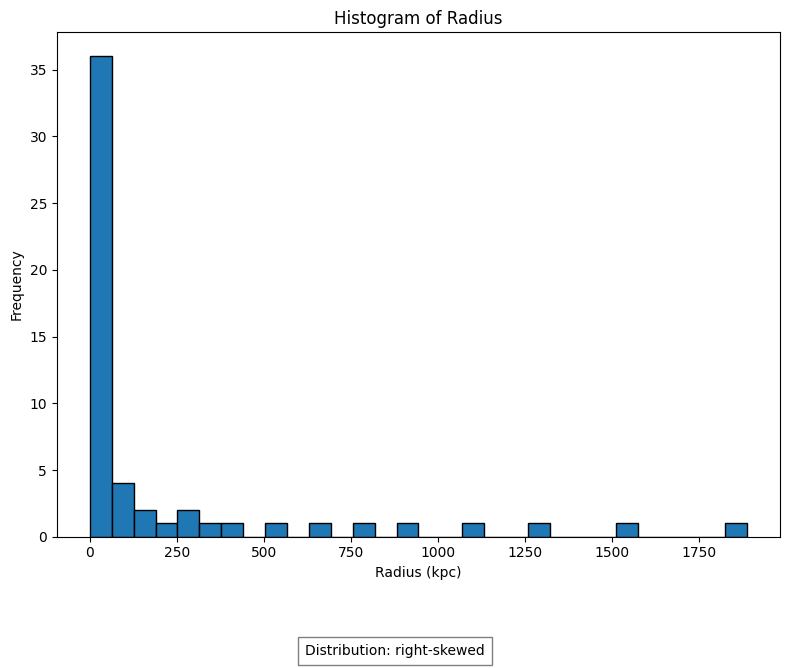

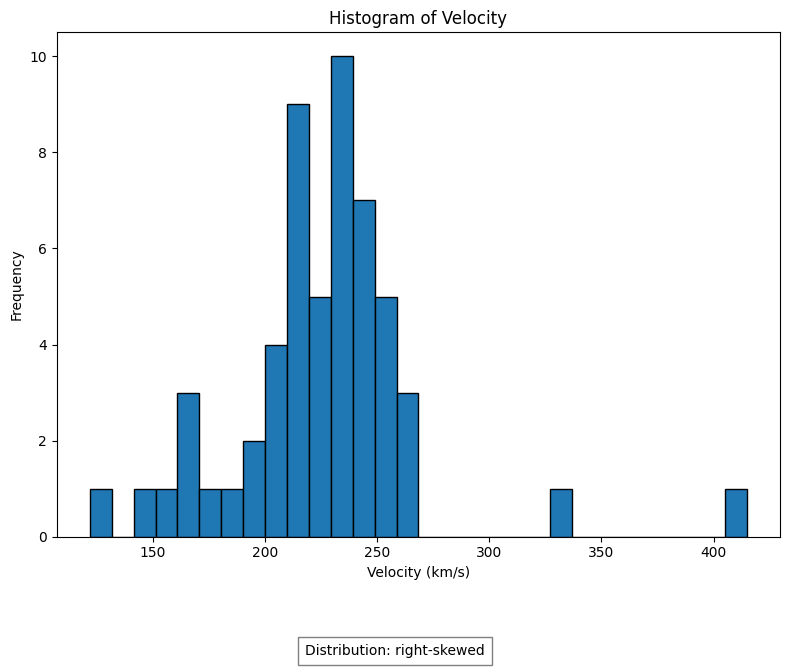

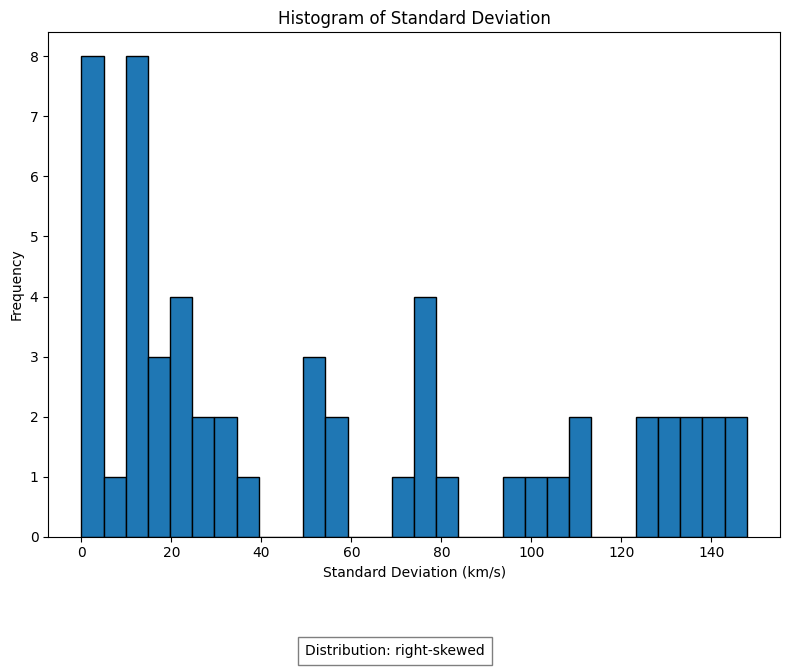

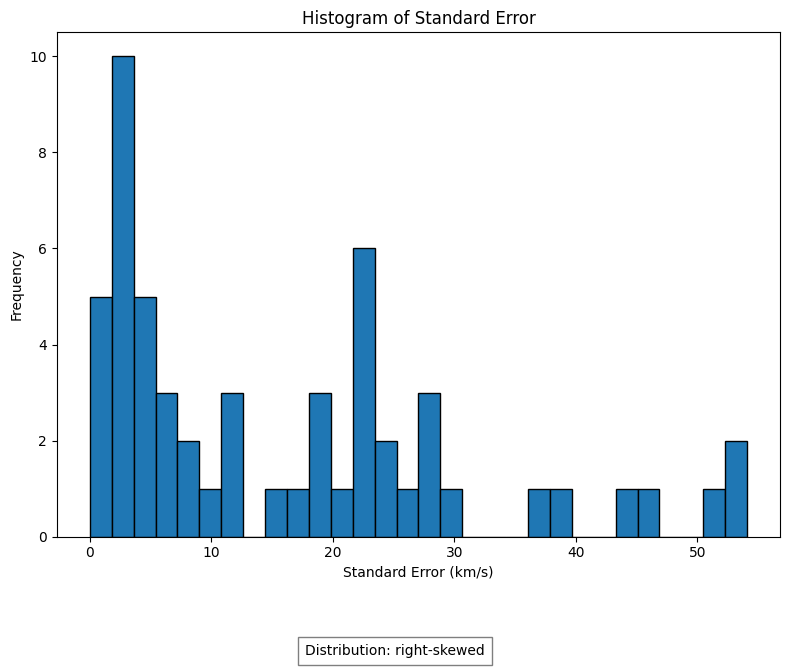

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv', skiprows=1)

units = {
    'R': 'kpc',
    'V': 'km/s',
    'St.dev.': 'km/s',
    'St.error': 'km/s'
}

m31 = m31.rename(columns={
    '#R(kpc': 'Radius',
    'V(km/s)': 'Velocity',
    'St.dev.': 'Standard Deviation',
    'St.error': 'Standard Error'
})

units = {
    'Radius': 'kpc',
    'Velocity': 'km/s',
    'Standard Deviation': 'km/s',
    'Standard Error': 'km/s'
}

def describe_distribution(data, col_name):
    skewness = data[col_name].skew()
    kurtosis = data[col_name].kurtosis()

    if abs(skewness) < 0.5:
        shape = "approximately symmetric"
    elif skewness > 0.5:
        shape = "right-skewed"
    elif skewness < -0.5:
        shape = "left-skewed"

    return shape

for column in m31.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    plt.hist(m31[column], bins=30, edgecolor='black')

    plt.xlabel(f"{column} ({units.get(column, '')})")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")

    shape_description = describe_distribution(m31, column)
    plt.figtext(0.5, -0.1, f"Distribution: {shape_description}", ha="center", fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

    plt.tight_layout()
    plt.show()

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size

Assume the distance is 778 $\pm$ 33 kpc
   

Calculate and print the distance like I printed the angular size.

To get the physical size of the visible component of Andromeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


In [36]:
from astropy import units as u

apparentSizeM31 = 3.167 * u.degree
m31angS = apparentSizeM31.to(u.radian)

distance = 770 * u.kpc
distance_uncertainty = 40 * u.kpc

physical_size = distance * m31angS.value

physical_size_uncertainty = physical_size * (distance_uncertainty / distance)

physical_size_kpc = physical_size

print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS))
print("Distance to Andromeda: {:.2f} ± {:.2f}".format(distance, distance_uncertainty))
print("Physical Size of the luminous component of Andromeda: {:.2f} ± {:.2f}".format(physical_size_kpc, physical_size_uncertainty))

Angular Size of the visible component of Andromeda: 0.06 rad
Distance to Andromeda: 770.00 kpc ± 40.00 kpc
Physical Size of the luminous component of Andromeda: 42.56 kpc ± 2.21 kpc


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [53]:
luminous_radius_kpc = 23.28 #from wikipedia: diameter 46.56 kpc/2

mask = m31['Radius'] >= luminous_radius_kpc
if mask.any():
    smallest_radius = m31.loc[mask, 'Radius'].min()
    velocity_at_radius = m31.loc[m31['Radius'] == smallest_radius, 'Velocity'].iloc[0]
    print(f"Smallest radius in dataset >= luminous radius: {smallest_radius:.2f} kpc")
    print(f"Velocity at radius {smallest_radius:.2f} kpc: {velocity_at_radius:.2f} km/s")
else:
    print("No radius in the dataset is >= the luminous radius.")

Smallest radius in dataset >= luminous radius: 23.74 kpc
Velocity at radius 23.74 kpc: 236.51 km/s


We expect the velocity to decrease as $1 / \sqrt{r}$ if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor $\sqrt{2}$ slower, three times as far a factor $\sqrt{3}$ slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [45]:
def getradii(data, N, luminous_radius):
    target_radius = N * luminous_radius
    mask = data['Radius'] >= target_radius
    if mask.any():
        smallest_radius = data.loc[mask, 'Radius'].min()
        velocity = data.loc[data['Radius'] == smallest_radius, 'Velocity'].iloc[0]
        velocity_uncertainty = data.loc[data['Radius'] == smallest_radius, 'Standard Error'].iloc[0]
        radius_uncertainty = 0  # Dataset radii are exact
        return smallest_radius, radius_uncertainty, velocity, velocity_uncertainty

In [59]:
#test
for N in [1, 2, 3]:
    radius, radius_uncertainty, velocity, velocity_uncertainty = getradii(m31, N, luminous_radius_kpc)
    if radius is not None:
        print(f"\nN = {N}:")
        print(f"Smallest radius >= {N} * {luminous_radius_kpc:.2f} kpc: {radius:.2f} ± {radius_uncertainty:.2f} kpc")
        print(f"Velocity at radius {radius:.2f} kpc: {velocity:.2f} ± {velocity_uncertainty:.2f} km/s")
        if N == 1:
            base_velocity = velocity
        else:
            expected_velocity = base_velocity / (N ** 0.5)
            print(f"Expected velocity (Keplerian decline): {expected_velocity:.2f} km/s")
    else:
        print(f"\nN = {N}: No radius in dataset >= {N * luminous_radius_kpc:.2f} kpc")


N = 1:
Smallest radius >= 1 * 23.28 kpc: 23.74 ± 0.00 kpc
Velocity at radius 23.74 kpc: 236.51 ± 1.58 km/s

N = 2:
Smallest radius >= 2 * 23.28 kpc: 49.22 ± 0.00 kpc
Velocity at radius 49.22 kpc: 237.07 ± 23.92 km/s
Expected velocity (Keplerian decline): 167.24 km/s

N = 3:
Smallest radius >= 3 * 23.28 kpc: 70.88 ± 0.00 kpc
Velocity at radius 70.88 kpc: 218.49 ± 24.66 km/s
Expected velocity (Keplerian decline): 136.55 km/s


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line) (e.g. with `df.plot(...)` if your data is stored as a dataframe `df`) showing the uncertainty dv at each quantity (if using `df.plot()` you can use the argument `yerr`)

2. each velocity as an errorbar with error equal to `err_tot` in three different colors of your choice (not black)

3. each velocity as an errorbar with error equal to `dv` in black

4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()``` or ```ax.text()``` if you have an axis object)

7. limit the x axis to the "relevant" portion of the data

/tmp/ipython-input-555927359.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


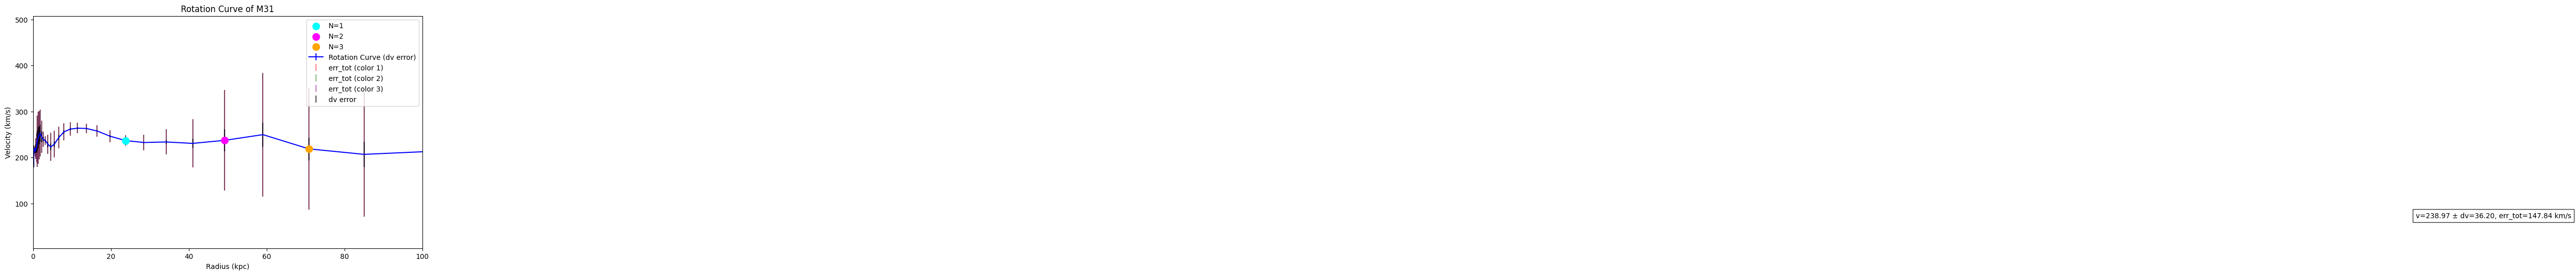

In [60]:
def plotGal(gal, rds):

    fig, ax = plt.subplots(figsize=(10, 6))

    gal.plot(x='Radius', y='Velocity', yerr='Standard Error', kind='line', ax=ax, color='blue',
             label='Rotation Curve (dv error)', linestyle='-', marker=None)

    colors_err_tot = ['red', 'green', 'purple']
    for i, color in enumerate(colors_err_tot):
        ax.errorbar(gal['Radius'], gal['Velocity'], yerr=gal['Standard Deviation'],
                    fmt='none', ecolor=color, alpha=0.5, label=f'err_tot (color {i+1})')

    ax.errorbar(gal['Radius'], gal['Velocity'], yerr=gal['Standard Error'],
                fmt='none', ecolor='black', alpha=0.7, label='dv error')

    colors_n = ['cyan', 'magenta', 'orange']
    for i, (radius, _, velocity, velocity_uncertainty) in enumerate(rds):
        if radius is not None:
            ax.scatter([radius], [velocity], color=colors_n[i], s=100, label=f'N={i+1}', zorder=5)

    max_err_idx = gal['Standard Deviation'].idxmax()
    max_err_radius = gal.loc[max_err_idx, 'Radius']
    max_err_velocity = gal.loc[max_err_idx, 'Velocity']
    max_err_tot = gal.loc[max_err_idx, 'Standard Deviation']
    max_err_dv = gal.loc[max_err_idx, 'Standard Error']
    ax.text(max_err_radius, max_err_velocity - max_err_tot - 10,
            f'v={max_err_velocity:.2f} ± dv={max_err_dv:.2f}, err_tot={max_err_tot:.2f} km/s',
            fontsize=10, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.8))

    ax.set_xlabel('Radius (kpc)')
    ax.set_ylabel('Velocity (km/s)')
    ax.set_title('Rotation Curve of M31')
    ax.set_xlim(0, 100)
    ax.legend()

    plt.tight_layout()
    plt.show()

m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv', skiprows=1)

m31 = m31.rename(columns={
    '#R(kpc': 'Radius',
    'V(km/s)': 'Velocity',
    'St.dev.': 'Standard Deviation',
    'St.error': 'Standard Error'
})


luminous_radius = 23.28

rds = [getradii(m31, N, luminous_radius) for N in [1, 2, 3]]

plotGal(m31, rds)


Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above ```getradii``` to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/\sqrt{r}$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/\sqrt{r}$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [71]:
def vratios(data, m31Rds, N, err='dv'):

    r1, _, v1, dv1 = m31Rds[0] if m31Rds and len(m31Rds) >= 1 else (None, None, None, None)
    if r1 is None:
        print("No radius found for N=1 in m31Rds")
        return

    if N <= len(m31Rds):
        rn, _, vn, dvn = m31Rds[int(N)-1]
    else:
        rn, _, vn, dvn = getradii(data, N, luminous_radius)
    if rn is None:
        print(f"No radius found for N={N}")
        return

    print(f"Debug: r1={r1:.2f}, v1={v1:.2f}, dv1={dv1:.2f}, rn={rn:.2f}, vn={vn:.2f}, dvn={dvn:.2f}")


    err1 = data.loc[data['Radius'] == r1, 'Standard Deviation'].iloc[0]
    errn = data.loc[data['Radius'] == rn, 'Standard Deviation'].iloc[0]
    print(f"Debug: err1={err1:.2f}, errn={errn:.2f}")

    ratio_r = rn / r1
    expected_ratio_v = 1.0 if N == 1 else 1 / (ratio_r ** 0.5)
    print(f"Expected ratio based on the radii: {expected_ratio_v:.4f}")

    ratio_v = vn / v1

    if err == 'dv':
        sigma_ratio_v = ratio_v * ((dvn / vn)**2 + (dv1 / v1)**2)**0.5
        error_label = 'dv'
        error_value = dvn
    elif err == 'err':
        sigma_ratio_v = ratio_v * ((errn / vn)**2 + (err1 / v1)**2)**0.5
        error_label = 'err'
        error_value = errn
    else:
        print(f"Invalid err parameter: {err}. Use 'dv' or 'err'.")
        return

    lower_2sigma = ratio_v - 2 * sigma_ratio_v
    upper_2sigma = ratio_v + 2 * sigma_ratio_v
    is_consistent = lower_2sigma <= expected_ratio_v <= upper_2sigma

    print(f"Calculated ratio using {error_label}: {ratio_v:.4f}")
    print(f"Uncertainty in calculated ratio using {error_label}: {sigma_ratio_v:.4f}")
    print(f"2-sigma lower limit ({error_label}): {lower_2sigma:.4f}")
    print(f"2-sigma upper limit ({error_label}): {upper_2sigma:.4f}")
    print(f"Is expected ratio within 2-sigma of calculated ratio ({error_label}): {is_consistent}")

try:
    m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv', skiprows=1)
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

m31 = m31.rename(columns={
    '#R(kpc': 'Radius',
    'V(km/s)': 'Velocity',
    'St.dev.': 'Standard Deviation',
    'St.error': 'Standard Error'
})

luminous_radius = 23.28


In [72]:
vratios(m31, m31Rds, 1)

vratios(m31, m31Rds, 1, err='err')

Debug: r1=23.74, v1=236.51, dv1=1.58, rn=23.74, vn=236.51, dvn=1.58
Debug: err1=11.73, errn=11.73
Expected ratio based on the radii: 1.0000
Calculated ratio using dv: 1.0000
Uncertainty in calculated ratio using dv: 0.0094
2-sigma lower limit (dv): 0.9811
2-sigma upper limit (dv): 1.0189
Is expected ratio within 2-sigma of calculated ratio (dv): True
Debug: r1=23.74, v1=236.51, dv1=1.58, rn=23.74, vn=236.51, dvn=1.58
Debug: err1=11.73, errn=11.73
Expected ratio based on the radii: 1.0000
Calculated ratio using err: 1.0000
Uncertainty in calculated ratio using err: 0.0701
2-sigma lower limit (err): 0.8597
2-sigma upper limit (err): 1.1403
Is expected ratio within 2-sigma of calculated ratio (err): True


In [73]:
vratios(m31, m31Rds, 2)

Debug: r1=23.74, v1=236.51, dv1=1.58, rn=49.22, vn=237.07, dvn=23.92
Debug: err1=11.73, errn=109.38
Expected ratio based on the radii: 0.6945
Calculated ratio using dv: 1.0024
Uncertainty in calculated ratio using dv: 0.1014
2-sigma lower limit (dv): 0.7996
2-sigma upper limit (dv): 1.2051
Is expected ratio within 2-sigma of calculated ratio (dv): False


In [74]:
vratios(m31, m31Rds, 2, err='err')

Debug: r1=23.74, v1=236.51, dv1=1.58, rn=49.22, vn=237.07, dvn=23.92
Debug: err1=11.73, errn=109.38
Expected ratio based on the radii: 0.6945
Calculated ratio using err: 1.0024
Uncertainty in calculated ratio using err: 0.4651
2-sigma lower limit (err): 0.0721
2-sigma upper limit (err): 1.9326
Is expected ratio within 2-sigma of calculated ratio (err): True


### Discuss!

Looking at my results, the velocity ratio ($ v_N/v_1 = 1.0000 $) matches the expected ratio (1.0000) exactly, as expected since the radius and velocity are the same, with both dv (Standard Error) and err (Standard Deviation) confirming consistency within 2-sigma limits. For $ N=2 $, the expected velocity ratio based on Keplerian decline ($ v \propto 1/\sqrt{r} $) is 0.6945, but the actual ratio is 1.0024, indicating a nearly flat rotation curve. The dv uncertainty (0.1014) results in a 2-sigma range (0.7996–1.2051) that excludes the expected ratio, suggesting inconsistency with Newton’s law (maybe due to dark matter?). However, the larger err uncertainty (0.4651) gives a broader 2-sigma range (0.0721–1.9326), which includes the expected ratio, making it appear consistent despite the flat rotation curve. This discrepancy highlights that Standard Deviation (err) overestimates the uncertainty compared to Standard Error (dv)

*Note:* In terms of mathematical equations, I use the small angle approximation:   $y = r * sin(\alpha) ~ \sim ~ r \alpha $ to assist me in deriving: $v^2 \propto\frac{1}{r}$ .  

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [ ]:
#delete all below

https://en.wikipedia.org/wiki/Milky_Way
    